In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from common import get_data_path

# Import data

In [3]:
hdf = pd.HDFStore(get_data_path('2016_04_12_10k.h5'))
df = hdf.select('DownstreamDebugTuple', columns=['is_true_track', 'is_true_seed'])
hdf.close()

In [4]:
df.head()

,is_true_track,is_true_seed
0,False,True
1,True,True
2,True,True
3,False,True
4,True,True


## Group by type

In [5]:
tt_ts = (df['is_true_track'] == True) & (df['is_true_seed'] == True)
gt_ts = (df['is_true_track'] == False) & (df['is_true_seed'] == True)
gt_gs = (df['is_true_track'] == False) & (df['is_true_seed'] == False)

In [6]:
d = df.copy()
d['type'] = ''
d.loc[tt_ts, 'type'] = 'TT/TS'
d.loc[gt_ts, 'type'] = 'GT/TS'
d.loc[gt_gs, 'type'] = 'GT/GS'

In [7]:
total = d.groupby('type').size()
frac = total / len(df)

# Count

In [8]:
count = pd.DataFrame({'total': total, 'frac': frac})
count

,frac,total
type,,
GT/GS,0.026239,9877
GT/TS,0.268874,101211
TT/TS,0.704888,265338


<IPython.core.display.Javascript object>


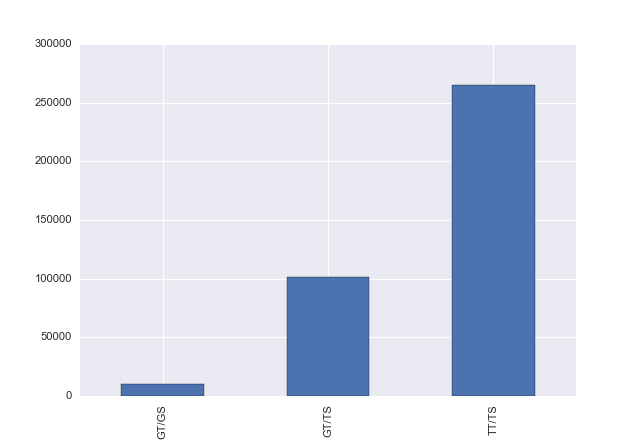

In [9]:
count['total'].plot.bar()